In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path
sns.set_theme("paper", style="whitegrid", rc={"figure.facecolor": "white"})

In [3]:
data_path = Path() / "data"
images_path = Path() / "images"

In [4]:
model_1 = "SEIHR"
model_2 = "SEIHRT"
with open(data_path / f"max_infection_{model_1}.npy", "rb") as f:
    max_infection_1 = np.load(f)
with open(data_path / f"max_infection_{model_2}.npy", "rb") as f:
    max_infection_2 = np.load(f)

In [45]:
infection_df = (
    pd.concat(
        {
            model_1: pd.DataFrame(max_infection_1, columns=["beta", "max(E)", "max(I)", "max(E+I)"]),
            model_2: pd.DataFrame(max_infection_2, columns=["beta", "max(E)", "max(I)", "max(E+I)"])
        }
    )
    .droplevel(1)
    .rename_axis("Model")
    .reset_index()
    .melt(id_vars=["beta", "Model"], var_name="Measurement")
)

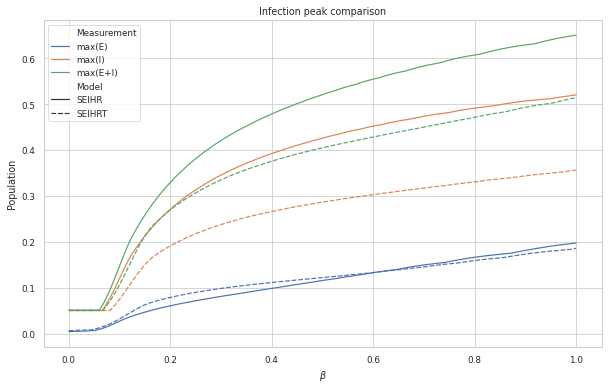

In [50]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
sns.lineplot(
    data=infection_df,
    x="beta",
    y="value",
    hue="Measurement",
    style="Model",
    ax=ax
)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel("Population")
ax.set_title(f"Infection peak comparison")
fig.savefig(images_path / f"infection_peak_comparison.png", dpi=300)

In [51]:
# def model2_peaks(beta, eta):
#   params = [0.5, 0, 0.5, 0.7, 0.4, 1/14, 1/7, 0.2, 0.05, 0.3, 0.1, 0.5, 0.01, 0.7]
#   params[0] = beta
#   params[6] = eta
#   t0, tn = span
#   t = np.linspace(t0, tn, tn - t0)

#   sol = SEIHTR_forward(span, y0, params)
#   z = sol.sol(t)

#   return np.max(z[2,:] + z[3,:])

# model2_peaks_vectorized = np.vectorize(model2_peaks)

In [52]:
# beta_array = np.arange(0, 1, 0.01)
# eta_array = np.arange(0, 1, 0.01)
# beta_xx, eta_yy = np.meshgrid(beta_array, eta_array)

# max_array_mesh = model2_peaks_vectorized(beta_xx, eta_yy)

In [53]:
# fig, ax = plt.subplots()
# cs = ax.contourf(beta_xx, eta_yy, max_array_mesh, 100, cmap="plasma")
# ax.set_xlabel(r"$\mathregular{\beta}$")
# ax.set_ylabel(r"$\mathregular{\eta}$")
# fig.colorbar(cs, ax=ax)
# fig.tight_layout()
# fig.savefig("model2_contour_plot.png", dpi=300)
# fig.show()